### About Yulu
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.
#### How you can help here?
The company wants to know:
 * Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
 * How well those variables describe the electric cycle demands!

### <span style='color:green '>Goal: </span>
#### <span style='color:green '>Analyze the YULU data to- </span>
*  <span style='color:green '>Examine whether the bikes rented differ based on the weather, season, and working days</span>
*  <span style='color:green '> Run different statistical tests to confirm the same </span>
*  <span style='color:green '>Provide recommendations based on Insights</span>

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot_2samples
from scipy.stats import pearsonr
import numpy as np
import random

In [102]:
dfYulu = pd.read_csv('yulu.csv')

In [161]:
dfYulu.head(6)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempGroup,humidityGroup
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0000,3,13,16,<10,81-100
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,8,32,40,<10,61-80
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,5,27,32,<10,61-80
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,3,10,13,<10,61-80
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,0,1,1,<10,61-80
5,2011-01-01 05:00:00,Spring,0,0,Mist,9.84,12.880,75,6.0032,0,1,1,<10,61-80


In [104]:
dfYulu.datetime.min()

'2011-01-01 00:00:00'

In [105]:
dfYulu.datetime.max()

'2012-12-19 23:00:00'

<span style='color:green '> The date range for the given Yulu dataset is between Jan-2011 to Dec-2012, however Yulu was founded in the year 2017!</span>
 
<span style='color:green '> Data for 'Datetime' has been fudged and any analysis done on this feature is useless. So I will be ignoring Datetime in my analysis.</span>

In [106]:
dfYulu.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [107]:
cat_cols = dfYulu.dtypes == 'object'
cat_cols= list(cat_cols[cat_cols].index)
cat_cols

['datetime']

In [108]:
numCols = dfYulu.dtypes != 'object'
numCols = list(numCols[numCols].index)
numCols

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count']

### Univariate and Bivariate analysis are performed while conducting different Statistical tests

## Outlier detection and treatment

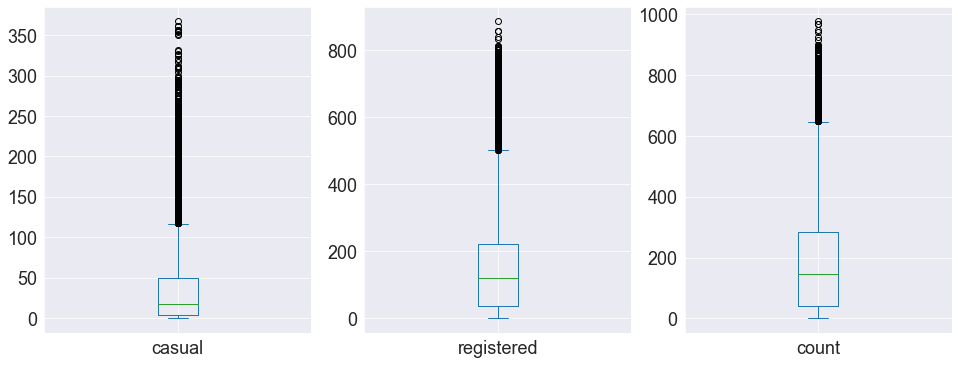

In [109]:
sns.set_style('darkgrid');
dfYulu[["casual", "registered", "count"]].plot(figsize=(22,6), subplots=True, layout=(1,4), kind='box',fontsize=18 );
sns.set_style('white');

<span style='color:green '> Since (casual + registered) = count, I will use 'count' for analysis and will only treat outliers for this feature.</span>

In [110]:
Q3 = np.quantile( dfYulu['count'] , 0.75)
Q1 = np.quantile( dfYulu['count'] , 0.25)
IQR = Q3-Q1
upperBound = Q3 + 1.5*IQR
upperBound

647.0

In [111]:
print("Removing", dfYulu[dfYulu['count'] > upperBound].value_counts().shape[0], "rows equivalent to", dfYulu[dfYulu['count'] > upperBound].value_counts().shape[0] / dfYulu.shape[0] * 100, "% of overall data points  " )


Removing 300 rows equivalent to 2.75583318023149 % of overall data points  


In [112]:
dfYulu= dfYulu[dfYulu['count']< upperBound]
print( "Size of the data after outlier treatment-", len(dfYulu))

Size of the data after outlier treatment- 10583


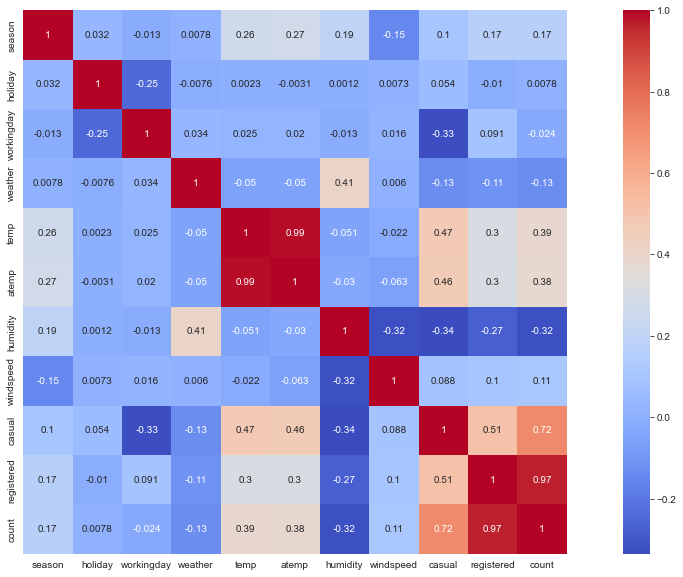

In [113]:
plt.figure(figsize=(20,10))
sns.heatmap(dfYulu.corr(method='pearson'), cmap='coolwarm', annot=True, square=True);

*  <span style='color:green '> Count has high correlation between 'registered', 'casual', 'temp' </span>
* <span style='color:green '>  As count = 'registered' + 'casual', high correlation was expected and we can ignore </span>
*  <span style='color:green '> Count has Negative correlation wrt humidity and slight positive corelation wrt Temperature </span>


In [114]:
import warnings
warnings.filterwarnings("ignore")

def plotBar_PieGraph(dfColumn):
    fig = plt.figure(figsize=(15,6));plt.xticks(fontsize=16);plt.yticks(fontsize=15);
    fig.suptitle('Distribution of '+dfColumn.name, fontsize=15 )
    plt.subplot(121)
    ax = sns.countplot(dfColumn)
    for container in ax.containers:
        ax.bar_label(container)
        
    plt.subplot(122)
    dfColumn.value_counts().plot.pie(autopct='%1.0f%%');


---
# <span style='background:yellow'> Analysis-1:</span>  Influence of 'Working day' on Yulu bike booking 

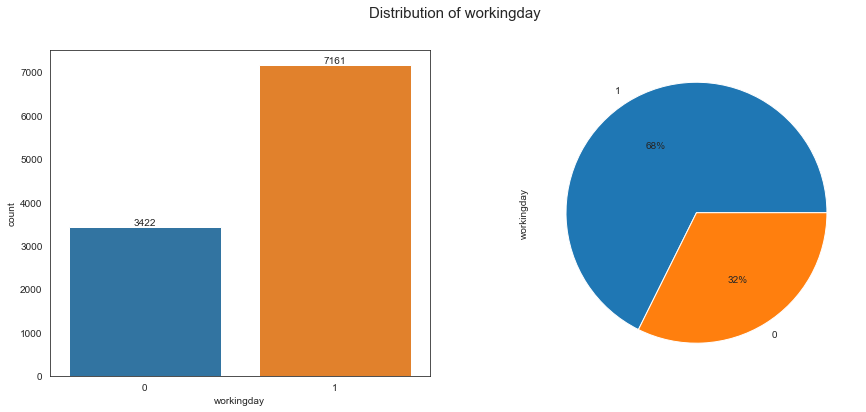

In [115]:
plotBar_PieGraph(dfYulu.workingday)

In [116]:
dfYulu.groupby('workingday')['casual', 'registered', 'count'].mean()

,casual,registered,count
workingday,,,
0,55.992694,124.972823,180.965517
1,23.360425,149.651166,173.011591


 * <span style='color:green '> Casual rides are more on non-working day</span>

 * <span style='color:green '> Registered rides are more on working day</span>

#### The mean rides on Working day(173) vs Non-working days(180) are close to each other.

#### But in order to apply our hypothesis 'Mean values are same for Working day vs Non-working day' to the entire population, we need to conduct hypothesis tests to confirm.


### Check the distributions-

In [117]:
workingdayBookings = dfYulu[dfYulu.workingday == 1]['count'].to_list()
nonworkingdayBookings = dfYulu[dfYulu.workingday == 0]['count'].to_list()

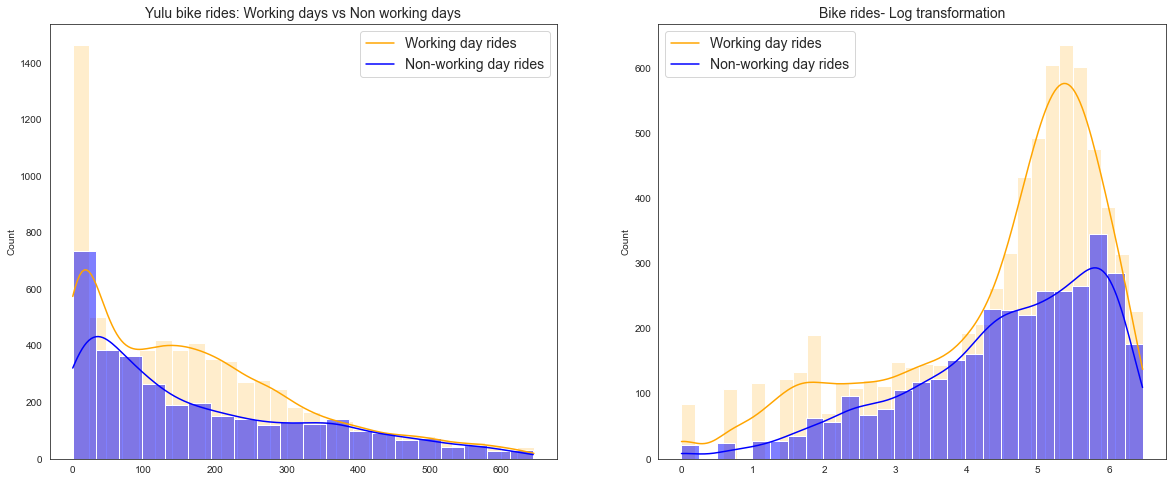

In [118]:
fig = plt.figure(figsize=(20,8))
plt.subplot(121)
sns.histplot(workingdayBookings, kde=True, color='orange', alpha = 0.2 )
sns.histplot(nonworkingdayBookings,kde=True, color= 'blue')
plt.title('Yulu bike rides: Working days vs Non working days', fontsize=14)
plt.legend(labels=[ "Working day rides", "Non-working day rides"], fontsize=14)

plt.subplot(122)
sns.histplot(np.log(workingdayBookings),kde=True, color='orange',alpha = 0.2 )
sns.histplot(np.log(nonworkingdayBookings), kde=True, color= 'blue' )
plt.title('Bike rides- Log transformation', fontsize=14)
plt.legend(labels=[ "Working day rides", "Non-working day rides"], fontsize=14);


 <span style='color:green '> Distributions look different</span>

### Testing for normality-

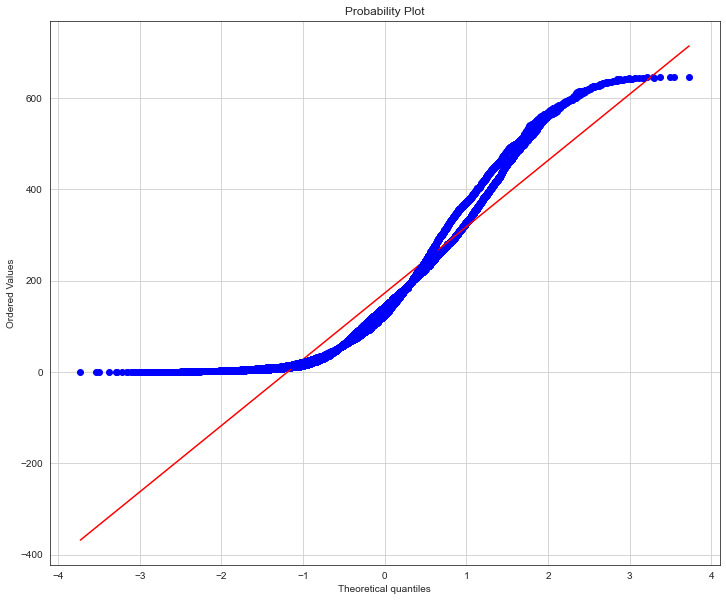

In [119]:
## QQ plot
fig,ax=plt.subplots(figsize=(12, 10))
plt.grid()
stats.probplot(workingdayBookings,plot=ax, fit= True)
stats.probplot(nonworkingdayBookings,plot=ax, fit= False);

 <span style='color:green '> Distributions aren't normal </span>

In [120]:
# check variance between workingday vs nonworkingday
dfYulu[dfYulu.workingday == 0]['count'].describe()

count    3422.000000
mean      180.965517
std       163.782166
min         1.000000
25%        43.000000
50%       124.000000
75%       295.750000
max       645.000000
Name: count, dtype: float64

In [121]:
dfYulu[dfYulu.workingday == 1]['count'].describe()

count    7161.000000
mean      173.011591
std       152.358993
min         1.000000
25%        38.000000
50%       143.000000
75%       262.000000
max       646.000000
Name: count, dtype: float64

 <span style='color:green '> Standard deviations are different too</span>

## Observations on distributions:

#### Clearly the data of bookings for Working day/ Non-working day are not normally distributed and doesn't have equal variance.
#### The t-test is invalid for small samples from non-normal distributions, but it is valid for large samples from non-normal distributions. Since we have suffiently large number of samples, we can proceed with T-test.
#### We'll also conduct a Kolmogorov-Smirnov Goodness of Fit Test (KS test) to confirm if the two distributions are similar or different

## Hypothesis formulation-
 ### Null hypothesis(Ho) - Distribution means are the  same (Working day rides vs Non working day rides)
 ### Alternate hypothesis(Ha) - Distribution means are different
 ### Significance level (alpha) =  5% (or) critical pValue = 0.05


# Statistical tests: T-test & KS test

In [122]:
(statistic, pVal) = stats.ttest_ind( a= workingdayBookings,
                                     b= nonworkingdayBookings,
                                     equal_var=False)  

print("T test statistic: ", statistic)
print("pValue: ", pVal)

T test statistic:  -2.3894729938440786
pValue:  0.01690170701900669


In [123]:
if pVal<= 0.05:
    print('Rejecting the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Rejecting the null hypothesis


In [124]:
stats.ks_2samp(workingdayBookings, nonworkingdayBookings, alternative='two-sided', mode='auto')

KstestResult(statistic=0.055573769568603756, pvalue=1.165026326521712e-06)

## Interpreting the test results-
### The p-value obtained from both the tests are less than alpha(5%), therefore we should 'Reject the Null hypothesis (Mean values are same)'
### With 95% confidence, we can conclude that the mean rides for Working day vs Non-working day are different.
### From the table below, it is clear that rides on Working days are less than Non working days

In [125]:
dfYulu.groupby('workingday')['casual', 'registered', 'count'].mean()

,casual,registered,count
workingday,,,
0,55.992694,124.972823,180.965517
1,23.360425,149.651166,173.011591


---
# <span style='background:yellow'>Analysis 2:</span> Influence of 'Weather' on Yulu bike booking

In [126]:
dfYulu.weather.replace(1, 'Clear', inplace=True)
dfYulu.weather.replace(2, 'Mist',inplace=True)
dfYulu.weather.replace(3, 'Light rain',inplace=True)
dfYulu.weather.replace(4, 'Heavy rain',inplace=True)

In [127]:
dfYulu.weather.value_counts()

Clear         6962
Mist          2770
Light rain     850
Heavy rain       1
Name: weather, dtype: int64

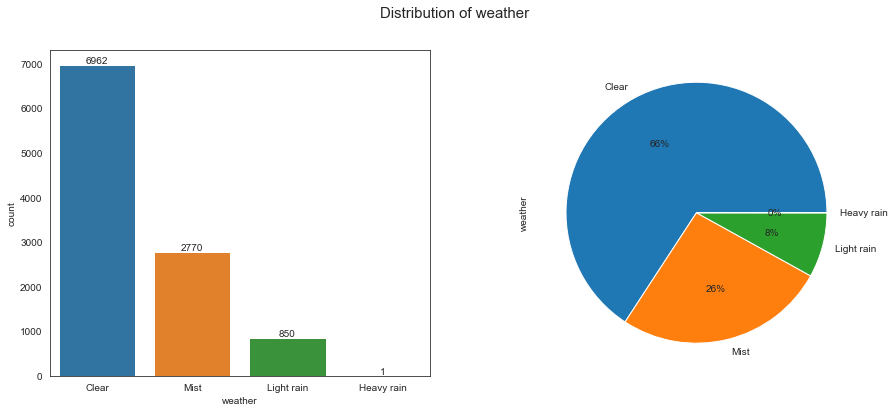

In [128]:
plotBar_PieGraph(dfYulu.weather)

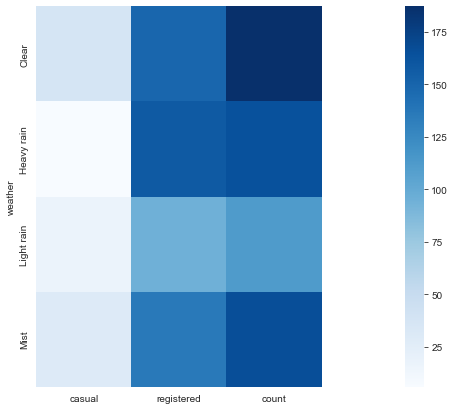

In [129]:
fig = plt.figure(figsize=(30,7))

sns.heatmap(dfYulu.groupby('weather')['casual',
                                      'registered', 
                                      'count'].mean(),cmap = 'Blues', square=True);

Heatmap indicates most rides happen during Clear weather

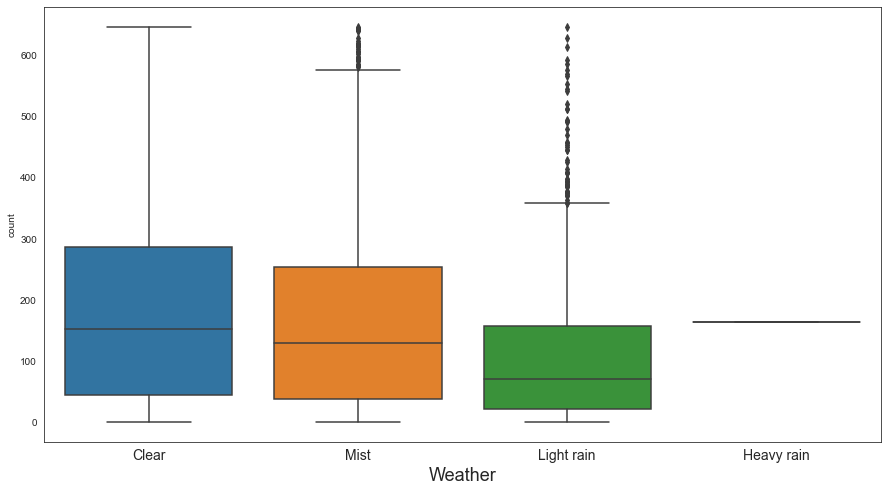

In [130]:
plt.figure(figsize=(15,8))
sns.boxplot(x='weather', y='count', data=dfYulu);
plt.xlabel('Weather', fontsize=18)
plt.xticks(fontsize=14);

Box plot indicates the means are different in the given sample data set

In [131]:
dfYulu.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
Clear,6962.0,187.131140,161.333785,1.0,45.0,153.0,286.0,646.0
Heavy rain,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0
Light rain,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0
Mist,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0


In [132]:
dfYulu.groupby('weather', sort=True)['casual', 'registered', 'count'].mean()

,casual,registered,count
weather,,,
Clear,37.696064,149.435076,187.131140
Heavy rain,6.000000,158.000000,164.000000
Light rain,16.896471,94.965882,111.862353
Mist,29.632852,136.484838,166.117690


When the weather is clear, the rides are more

While raining, the bookings reduces significantly,
and there is just one record of Heavy rain ride

In [133]:
# extract rides made during different weather

clear_rides = dfYulu[dfYulu.weather == 'Clear']['count']
mist_rides = dfYulu[dfYulu.weather == 'Mist']['count']
lightrain_rides = dfYulu[dfYulu.weather == 'Light rain']['count']
heavyrain_rides = dfYulu[dfYulu.weather == 'Heavy rain']['count']

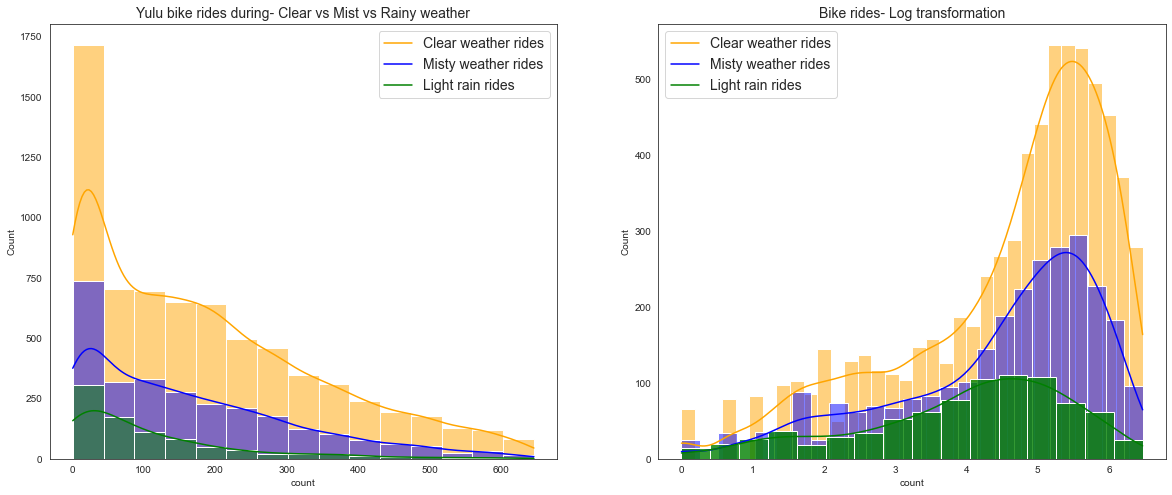

In [134]:
fig = plt.figure(figsize=(20,8))

# Plot Weather rides distributions
plt.subplot(121)
sns.histplot(clear_rides, kde=True, color='orange', bins=15)
sns.histplot(mist_rides, kde=True, color= 'blue', alpha = 0.5,bins=15)
sns.histplot(lightrain_rides, kde=True, color= 'green', alpha = 0.5,bins=15)
plt.title('Yulu bike rides during- Clear vs Mist vs Rainy weather', fontsize=14)
plt.legend(labels=["Clear weather rides", "Misty weather rides", "Light rain rides"], fontsize=14)

# Plot Log normal distribution
plt.subplot(122)
sns.histplot(np.log(clear_rides),kde=True, color='orange' )
sns.histplot(np.log(mist_rides), kde=True, color= 'blue', alpha = 0.5)
sns.histplot(np.log(lightrain_rides),kde=True, color= 'green', alpha = 0.8)
plt.title('Bike rides- Log transformation', fontsize=14)
plt.legend(labels=["Clear weather rides", "Misty weather rides", "Light rain rides"], fontsize=14);

## T-test conducted on combination of Weather pairs

### Hypothesis formulation-
*  Null hypothesis(Ho) - Distribution means are the  same between weather pairs
*  Alternate hypothesis(Ha) - Distribution means are different
*  Significance level (alpha) =  5% (or) critical pValue = 0.05

In [135]:
# Get all the Weather pairs
weatherList = ['Clear', 'Mist', 'Light rain', 'Heavy rain']
weather_pairs = []

for i in range(3):
    for j in range(i+1,4):
        weather_pairs.append((weatherList[i], weatherList[j]))

# Conduct T-test on each pair
for i, j in weather_pairs: 
    print(i + " vs "+ j + ":")
    print(stats.ttest_ind( dfYulu[dfYulu.weather == i]['count'], dfYulu[dfYulu.weather == j]['count']))
    print("")

Clear vs Mist:
Ttest_indResult(statistic=5.943446490761515, pvalue=2.886781466006918e-09)

Clear vs Light rain:
Ttest_indResult(statistic=13.155647048206458, pvalue=4.1073215337373295e-39)

Clear vs Heavy rain:
Ttest_indResult(statistic=nan, pvalue=nan)

Mist vs Light rain:
Ttest_indResult(statistic=9.787697921392876, pvalue=2.40232985245347e-22)

Mist vs Heavy rain:
Ttest_indResult(statistic=nan, pvalue=nan)

Light rain vs Heavy rain:
Ttest_indResult(statistic=nan, pvalue=nan)



### Inference from T-test:

*  With alpha 5%, we see that pValue < 0.05, hence we reject the Null hypothesis (Distribution means are the same) and conclude that Distribution of weather pairs are different.
*  (Clear vs Mist), (Clear vs Light rain), (Mist vs Light rain) distributions are different from one another 


## ANOVA test on Weather

In [136]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('count ~ C(weather)',                 # Model: count vs categories(Weather)
             data = dfYulu ).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)    #Anova method 
print (anova_result)

                  sum_sq       df          F        PR(>F)
C(weather)  4.628026e+06      3.0  64.380489  3.029209e-41
Residual    2.534924e+08  10579.0        NaN           NaN


## Inference from Anova test
### P-value ≤ α: The differences between some of the means are statistically significant


## Finding out which pairs of 'Weather' are significantly different from each other using "Tukey test"

group1,group2,meandiff,p-adj,lower,upper,reject
Clear,Heavy rain,-23.1311,0.9,-420.8972,374.6349,False
Clear,Light rain,-75.2688,0.001,-89.7199,-60.8177,True
Clear,Mist,-21.0135,0.001,-29.9484,-12.0785,True
Heavy rain,Light rain,-52.1376,0.9,-450.1091,345.8338,False
Heavy rain,Mist,2.1177,0.9,-395.6916,399.927,False
Light rain,Mist,54.2553,0.001,38.6598,69.8509,True


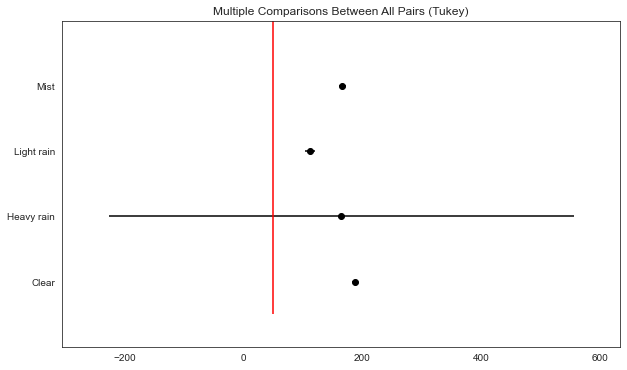

In [137]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=dfYulu['count'],      # Data
                          groups=dfYulu['weather'],   # Groups
                          alpha=0.05)                 # Significance level

tukey.plot_simultaneous()                             # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()                                       # See test summary

Since we only have one record of Heavy rain, we can ignore its test result

## Interpreting Tukey test results 
Column 'Reject' indicates: 
* True-> Distributions are Significantly different,   
* False -> Distributions are Not significantly different) 
 

###  (Clear vs Light rain), (Clear vs Mist), (Light rain vs Mist) distributions are different from one another 

---
# <span style='background:yellow'> Analysis 3:</span> Influence of 'Season' on bike rides

In [138]:
dfYulu.season.replace(1, 'Spring', inplace=True)
dfYulu.season.replace(2, 'Summer',inplace=True)
dfYulu.season.replace(3, 'Fall',inplace=True)
dfYulu.season.replace(4, 'Winter',inplace=True)

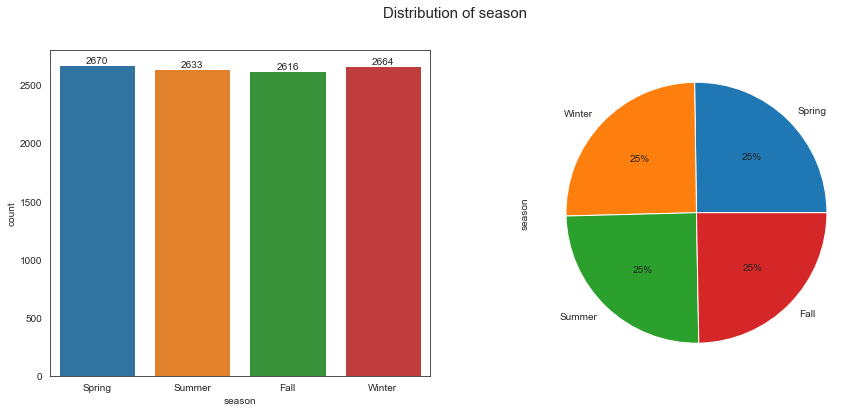

In [139]:
plotBar_PieGraph(dfYulu.season)

In [140]:
dfYulu.groupby('season')['casual', 'registered', 'count'].mean()

,casual,registered,count
season,,,
Fall,49.709862,160.774465,210.484327
Spring,14.509363,98.285768,112.795131
Summer,44.748956,150.904671,195.653627
Winter,27.134384,157.270270,184.404655


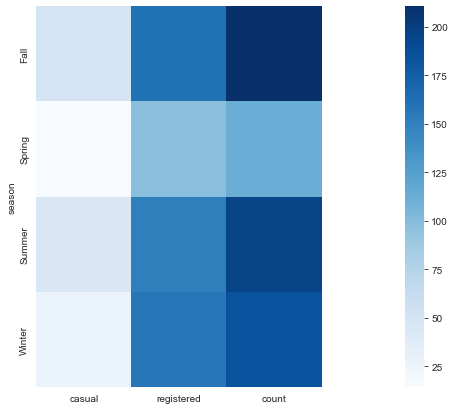

In [141]:
fig = plt.figure(figsize=(30,7))

sns.heatmap(dfYulu.groupby('season')['casual',
                                      'registered', 
                                      'count'].mean(),cmap = 'Blues', square=True);

 <span style='color:green '>  Demand: Fall > Summer > Winter > Spring </span>

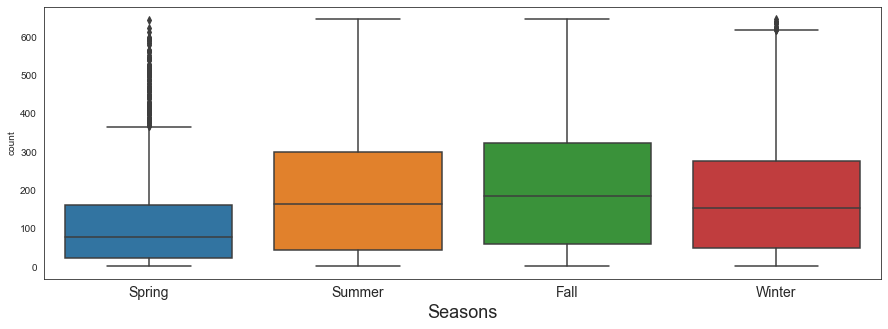

In [142]:
plt.figure(figsize=(15,5))
sns.boxplot(x='season', y='count', data=dfYulu);
plt.xlabel('Seasons', fontsize=18)
plt.xticks(fontsize=14);

In [143]:
# extract rides made during different season

spring_rides = dfYulu[dfYulu.season == 'Spring']['count']
summer_rides = dfYulu[dfYulu.season == 'Summer']['count']
fall_rides   = dfYulu[dfYulu.season == 'Fall']['count']
winter_rides = dfYulu[dfYulu.season == 'Winter']['count']


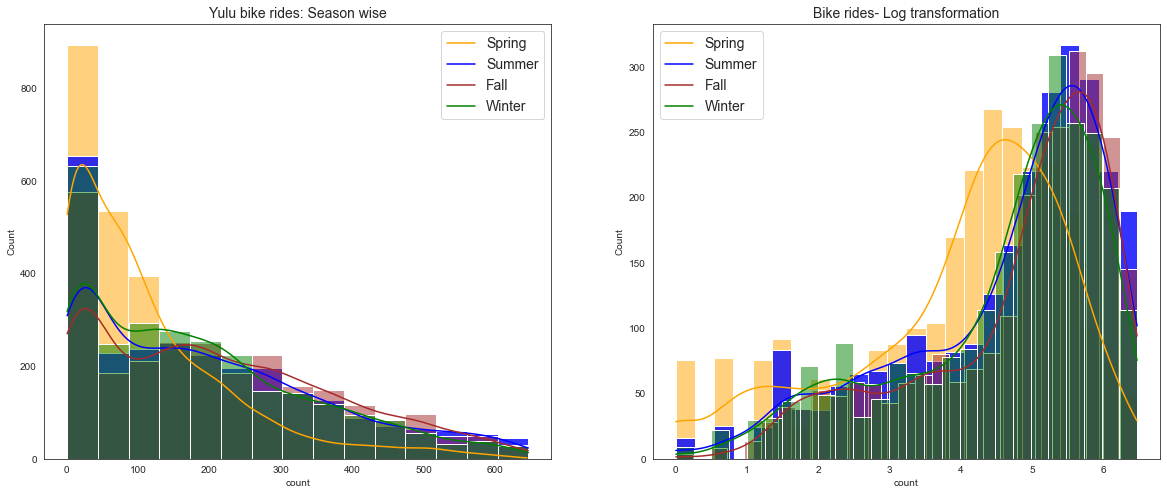

In [144]:
fig = plt.figure(figsize=(20,8))

# Plot Weather rides distributions
plt.subplot(121)
sns.histplot(spring_rides, kde=True, color='orange', bins=15)
sns.histplot(summer_rides, kde=True, color= 'blue', alpha = 0.8,bins=15)
sns.histplot(fall_rides, kde=True, color= 'brown', alpha = 0.5,bins=15)
sns.histplot(winter_rides, kde=True, color= 'green', alpha = 0.5,bins=15)

plt.title('Yulu bike rides: Season wise', fontsize=14)
plt.legend(labels=["Spring", "Summer", "Fall", "Winter"], fontsize=14)

#Plot Log normal distribution
plt.subplot(122)
sns.histplot(np.log(spring_rides),kde=True, color='orange' )
sns.histplot(np.log(summer_rides), kde=True, color= 'blue', alpha = 0.8)
sns.histplot(np.log(fall_rides),kde=True, color= 'brown', alpha = 0.5)
sns.histplot(np.log(winter_rides),kde=True, color= 'green', alpha = 0.5)

plt.title('Bike rides- Log transformation', fontsize=14)
plt.legend(labels=["Spring", "Summer", "Fall", "Winter"], fontsize=14);


Too much overlapping, much cant be inferred from this

# ANOVA test on Season

In [145]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('count ~ C(season)',                 # Model: count vs categories(Weather)
             data = dfYulu ).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)    #Anova method 
print (anova_result)

                 sum_sq       df           F         PR(>F)
C(season)  1.498051e+07      3.0  217.266984  8.891093e-137
Residual   2.431399e+08  10579.0         NaN            NaN


## Inference from Anova test
### P-value ≤ α: The differences between some of the means are statistically significant

## Finding out which pairs of 'Season' are significantly different from each other using "Tukey test"

group1,group2,meandiff,p-adj,lower,upper,reject
Fall,Spring,-97.6892,0.001,-108.4052,-86.9732,True
Fall,Summer,-14.8307,0.0022,-25.5839,-4.0775,True
Fall,Winter,-26.0797,0.001,-36.8016,-15.3577,True
Spring,Summer,82.8585,0.001,72.16,93.557,True
Spring,Winter,71.6095,0.001,60.9424,82.2766,True
Summer,Winter,-11.249,0.035,-21.9534,-0.5445,True


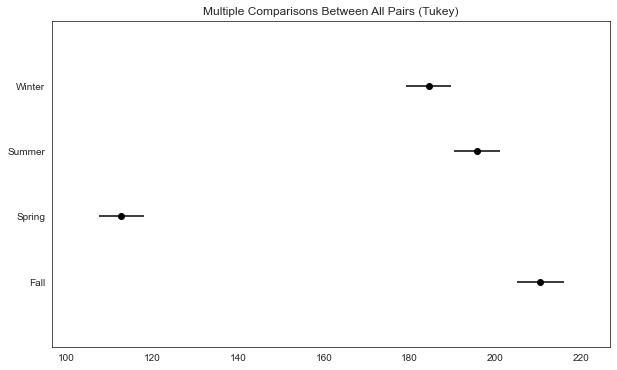

In [146]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=dfYulu['count'],      # Data
                          groups=dfYulu['season'],   # Groups
                          alpha=0.05)                 # Significance level

tukey.plot_simultaneous()                             # Plot group confidence intervals
tukey.summary()  

## Interpreting Tukey test results 
Column 'Reject' indicates: 
* True-> Distributions are Significantly different,   
* False -> Distributions are Not significantly different) 

## All combinations of Season pairs are significantly different from one another

---
# <span style='background:yellow'> Analysis 4:</span> Correlation between 'Weather' and 'Season'? 

In [147]:
## Mean rides: Season vs Weather

g1 = dfYulu.groupby(['weather', 'season'])['count'].mean().round(1)
g1.unstack(level='season')

season,Fall,Spring,Summer,Winter
weather,,,,
Clear,218.2,121.8,213.2,194.3
Heavy rain,NaN,164.0,NaN,NaN
Light rain,143.0,61.2,121.0,123.6
Mist,208.6,106.0,176.0,180.7


### Contingency Table

In [148]:
# Total rides: Season vs Weather

contingencyTable = pd.crosstab(dfYulu.weather, dfYulu.season )
contingencyTable

season,Fall,Spring,Summer,Winter
weather,,,,
Clear,1842,1744,1720,1656
Heavy rain,0,1,0,0
Light rain,195,211,223,221
Mist,579,714,690,787


# Chi-Square Test of Independence

## Hypothesis formulation-
### The null hypothesis (Ho) of the Chi-Square test is that no relationship exists on the categorical variables between Weather and Season; they are independent.
### The alternate hypothesis(Ha) is there is a relationship between the categorical variables; they are dependent
### Significance level (alpha) =  5% (or) critical pValue = 0.05


In [149]:
(chi2, pVal, dof, t) = stats.chi2_contingency(observed=contingencyTable)
print(chi2)
print("p Value: ", pVal)
print(dof)
print(t)

47.16590591959627
p Value:  3.6550317439064896e-07
9
[[1.72092904e+03 1.75645280e+03 1.73211244e+03 1.75250572e+03]
 [2.47188888e-01 2.52291411e-01 2.48795238e-01 2.51724464e-01]
 [2.10110555e+02 2.14447699e+02 2.11475952e+02 2.13965794e+02]
 [6.84713219e+02 6.98847208e+02 6.89162808e+02 6.97276765e+02]]


## Interpreting the test results-


For a Chi-square test, a p-value that is less than or equal to your significance level indicates there is sufficient evidence to conclude that the observed distribution is not the same as the expected distribution. 
You can conclude that a relationship exists between the categorical variables.

### As the p-value is close to 0, it means there is a significant relationship between Season and Weather. Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

## Visualzing the dependency between Weather and Season with various plots

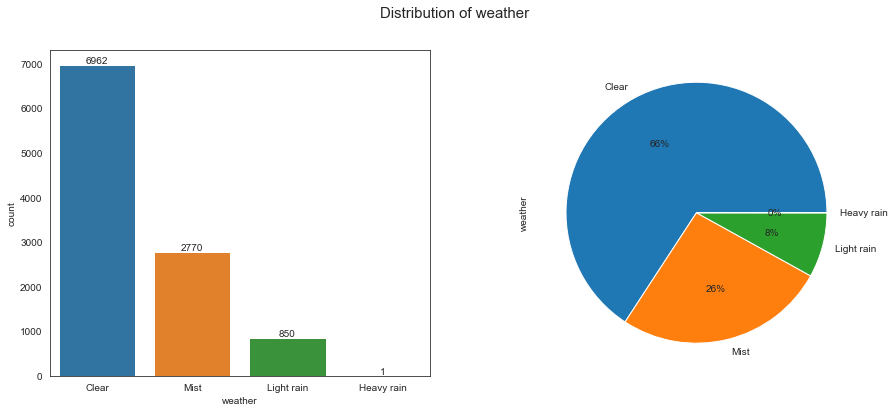

In [150]:
plotBar_PieGraph(dfYulu.weather)

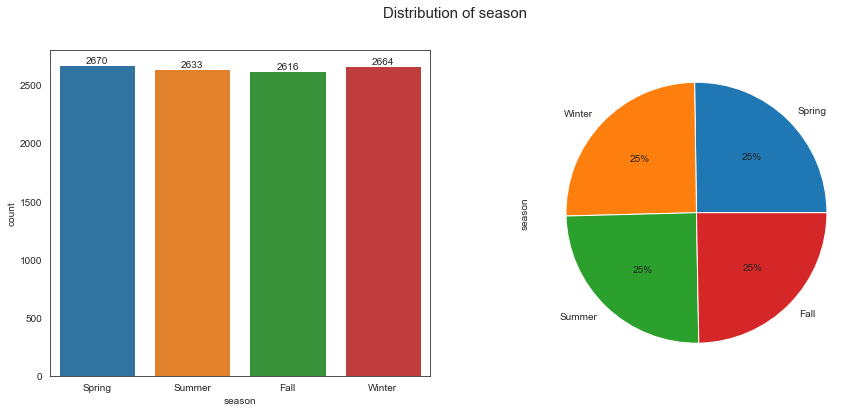

In [151]:
plotBar_PieGraph(dfYulu.season)

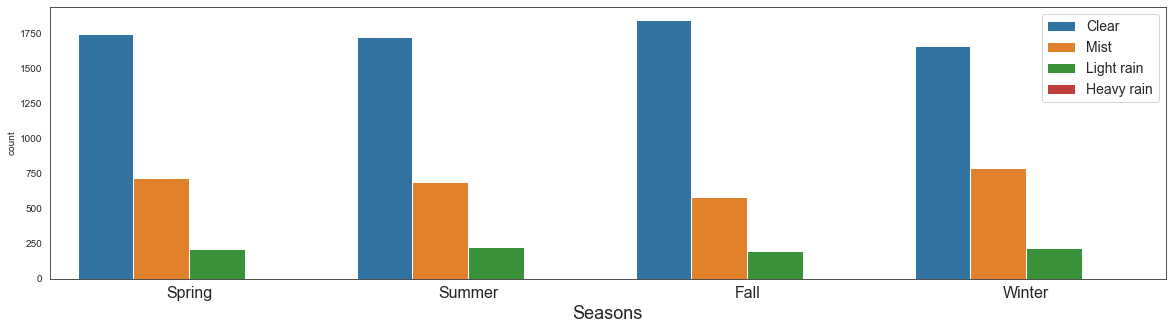

In [152]:
plt.figure(figsize=(20, 5))
sns.countplot(x='season', hue='weather', data=dfYulu);
plt.legend(fontsize=14)
plt.xlabel('Seasons', fontsize=18)
plt.xticks(fontsize=16);

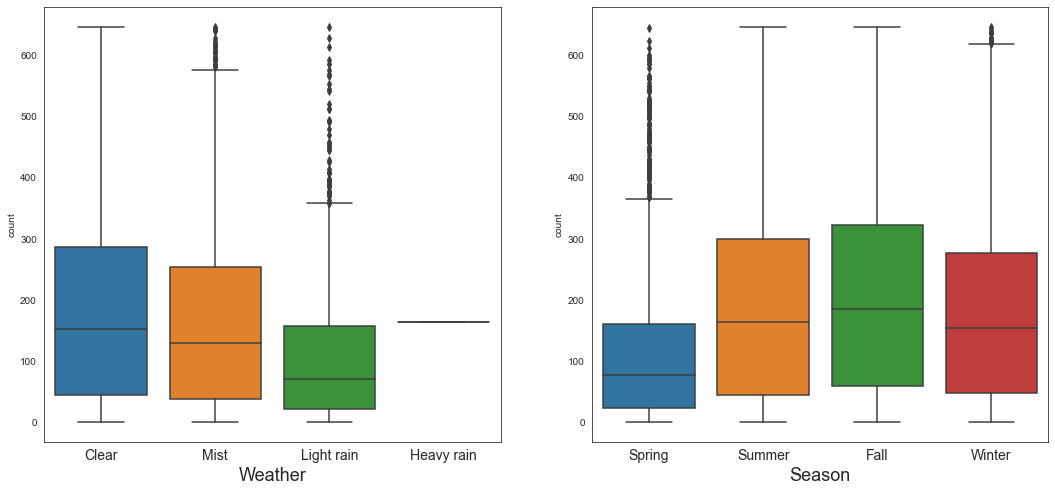

In [153]:
fig= plt.figure(figsize=(18, 8))

plt.subplot(121)
sns.boxplot(x='weather', y='count', data=dfYulu);
plt.xlabel('Weather', fontsize=18)
plt.xticks(fontsize=14);
plt.subplot(122)
sns.boxplot(x='season', y='count', data=dfYulu);
plt.xlabel('Season', fontsize=18)
plt.xticks(fontsize=14);

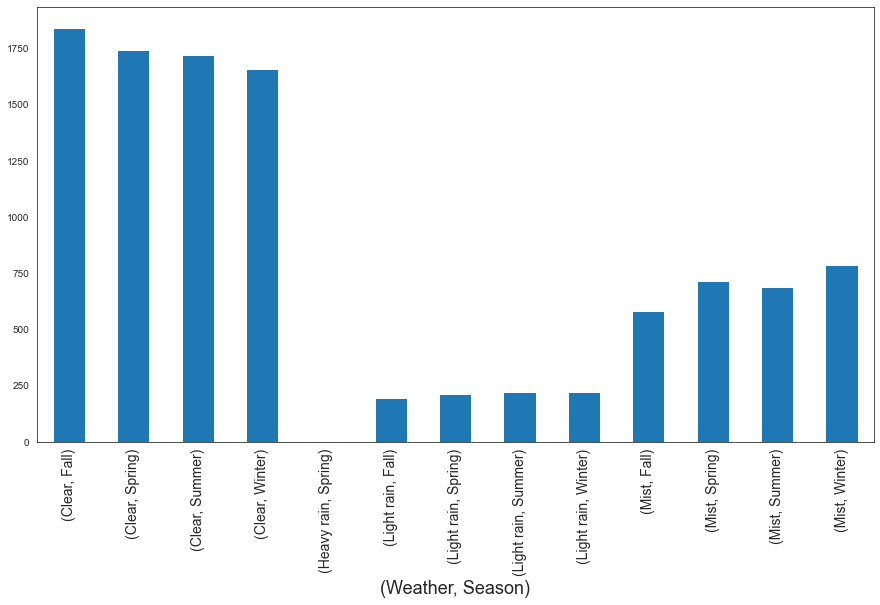

In [160]:
dfYulu.groupby(by=['weather', 'season'], sort=True)['count'].count().plot(kind='bar', figsize=(15,8))
plt.xlabel('(Weather, Season)', fontsize=18)
plt.xticks(fontsize=14);

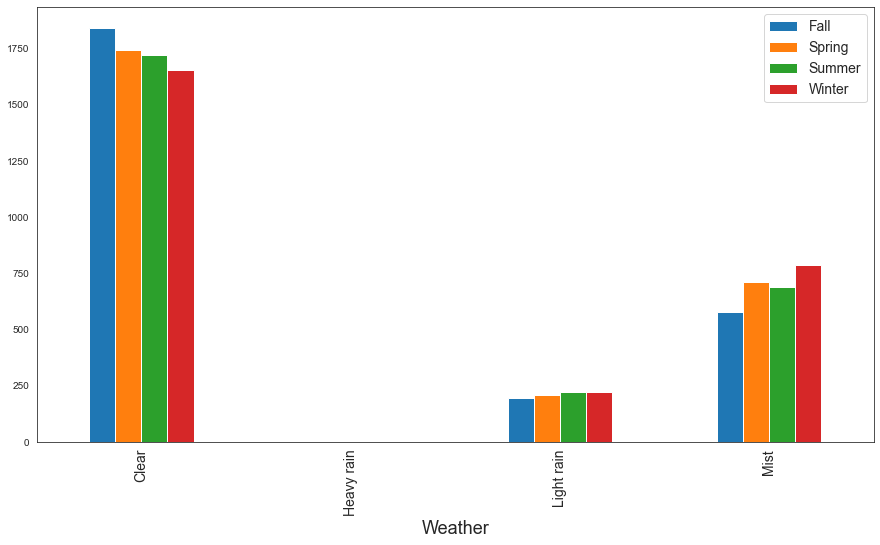

In [155]:
g = dfYulu.groupby(by=['weather', 'season'], sort=True)['count'].count()
g.unstack(level = 'season').plot(kind='bar', figsize=(15,8))
plt.legend(fontsize=14)
plt.xlabel('Weather', fontsize=18)
plt.xticks(fontsize=14);


## Summarizing the dependencies between Weather vs Season:

* Weather is more Clear during Fall, Spring, Summer, least during Winter season.

* Light Rain is almost uniform across Seasons.

* Mist is more during Winter, and least during Fall season.


####  Most rides done during Fall season, and when the weather is Clear

# <span style='background:yellow'> Analysis 5:</span> Influence of 'Temperature' and 'Humidity'

### Pearson correlation coeficient

In [156]:
corr1, _ = pearsonr(dfYulu['temp'], dfYulu['count'])
corr2, _ = pearsonr(dfYulu['humidity'], dfYulu['count'])
corr3, _ = pearsonr(dfYulu['windspeed'], dfYulu['count'])

print('Pearsons correlation Temp vs Ride count: %.3f' % corr1)
print('Pearsons correlation Humidity vs Ride count: %.3f' % corr2)
print('Pearsons correlation Humidity vs Ride count: %.3f' % corr3)

Pearsons correlation Temp vs Ride count: 0.388
Pearsons correlation Humidity vs Ride count: -0.323
Pearsons correlation Humidity vs Ride count: 0.110


#### <span style='color:green '>Rides are positively correlated wrt Temperature and negatively correlated wrt Humidity </span>

In [157]:
# Creating bins for Temperature and Humidity
dfYulu['tempGroup'] = pd.cut(dfYulu['temp'], [0,10,15,20,25,30,35,42], labels=['<10', '10-15','16-20' ,'21-25','26-30', '31-35', '35-40'])
dfYulu['humidityGroup'] = pd.cut(dfYulu['humidity'], [0,20,40,60,80,100], labels=['0-20', '21-40','41-60' ,'61-80','81-100'])


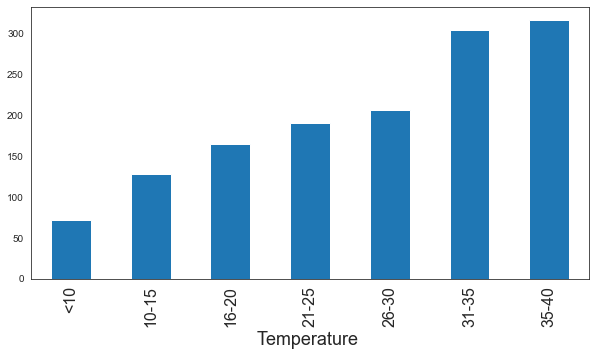

In [158]:
dfYulu.groupby('tempGroup')['count'].mean().plot(kind='bar', figsize=(10,5));
plt.xlabel('Temperature ', fontsize=18)
plt.xticks(fontsize=16);

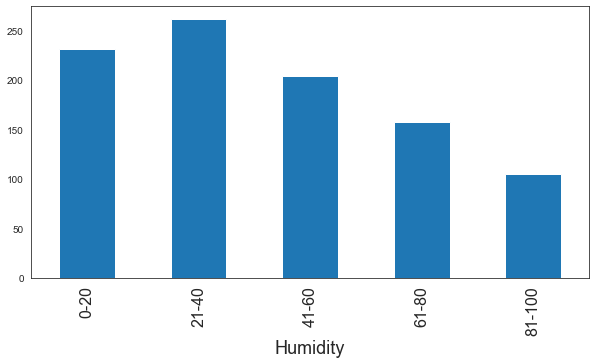

In [159]:
dfYulu.groupby('humidityGroup')['count'].mean().plot(kind='bar',figsize=(10,5));
plt.xlabel('Humidity', fontsize=18)
plt.xticks(fontsize=16);

 * <span style='color:green'> Most rides were made when temperature is between 20-40 degrees </span>
 * <span style='color:green'> Rides drop when the humidity starts to increase (>60) </span>

# Summary/ Insights:

* Casual rides are more on Non-working days
* Registered rides are more on Working days
* Non-working day rides >  Working day rides (Mean)
* Rides are more when Weather is Clear
* Rides are least when its raining
* Season wise demand: Fall > Summer > Winter > Spring
* Rides are positively correlated wrt Temperature and negatively correlated wrt Humidity
* Most rides are made when temperature is between 20-40 degrees
* Rides drop when the humidity starts to increase (>60)

Chi square test insights between Weather and Season: 
* Weather is more Clear during Fall & Summer, least during Winter season.
* Light Rain is almost uniform across the Seasons.
* Mist is more during Winter, and least during Fall season.

# Recommendations:

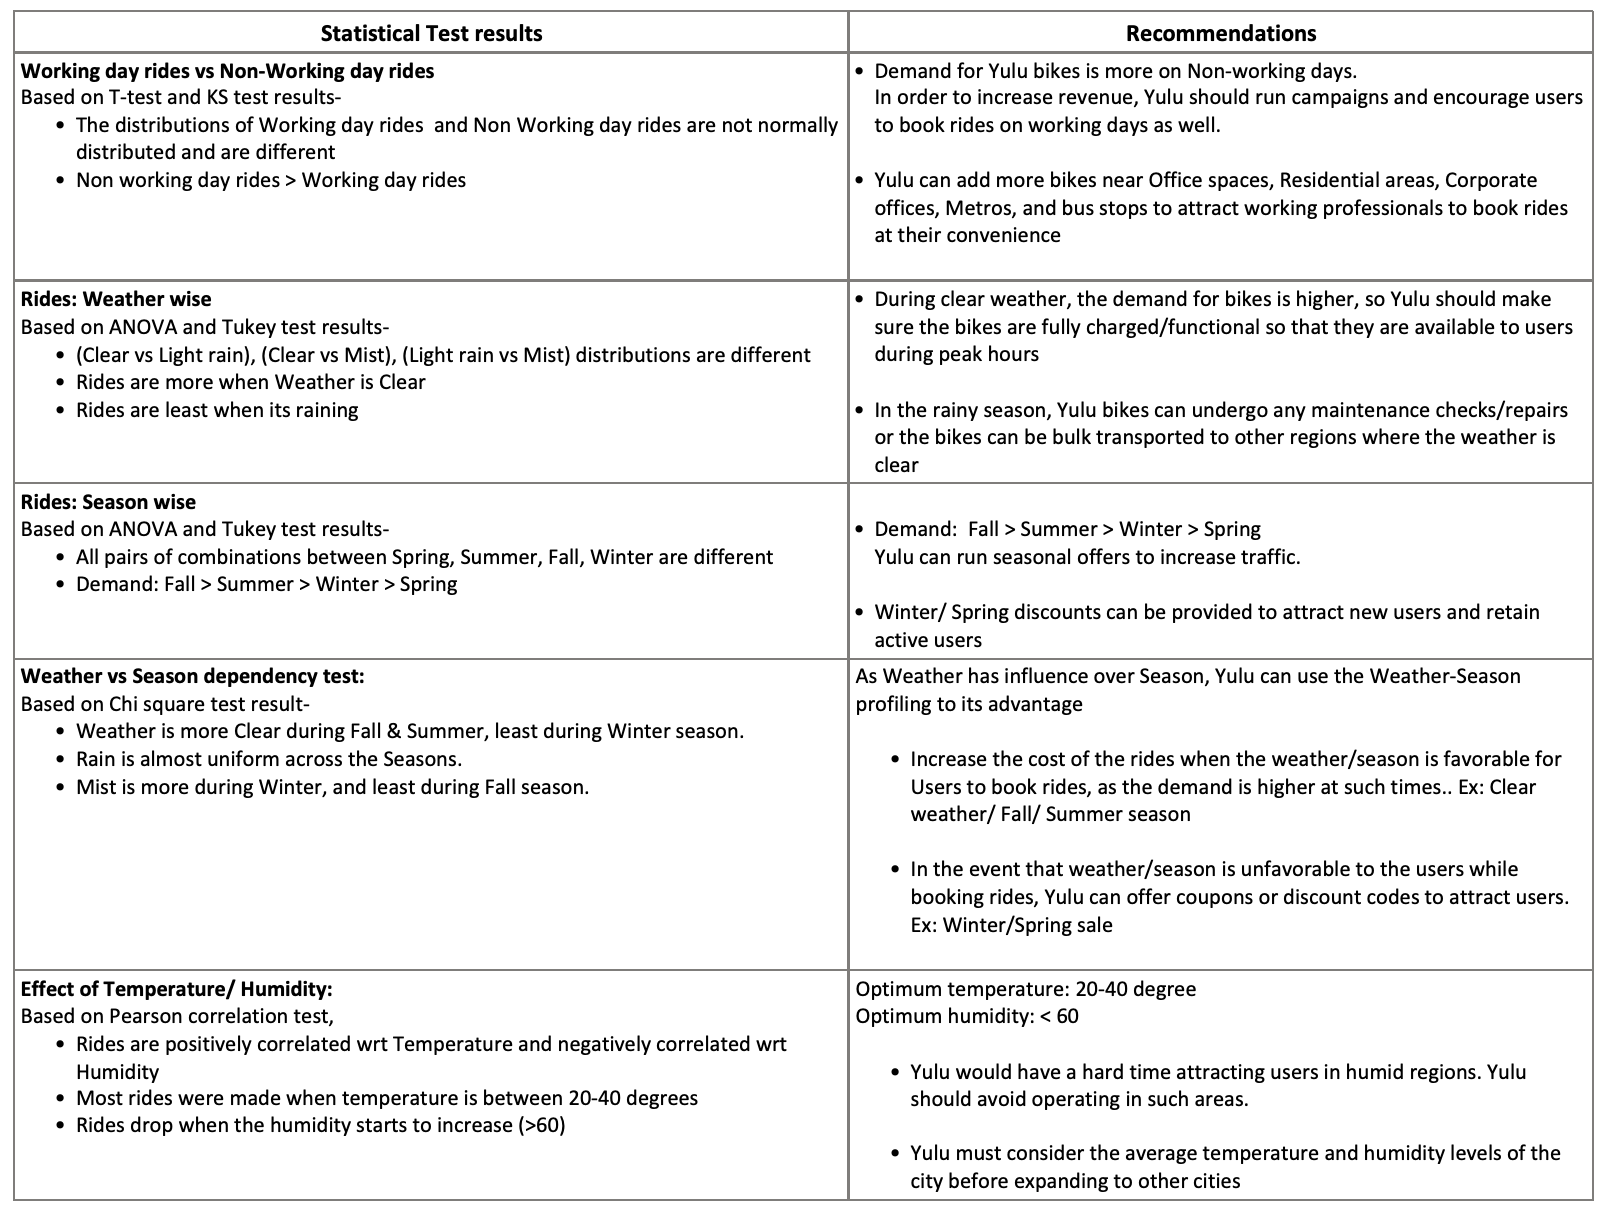